<a href="https://colab.research.google.com/github/xscbsx/udacity-data-scientist-nanodegree/blob/main/Article_Data_Scientist_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)
In this project, we analysed the data of more than 200 data scientist job positions extracted from during the period of xxx, with features such as:

*   Salary Estimate
*   Location
*   Company Rating
*   Job Description
*   and more


In [ ]:
t

# Questions


1.   Which companies have the most number of data scientist positions?
2.   What's the minimum and maximum salary?
3.   Which cities offer more job opportunities?
4.   What kind of industry offers higher salaries?






*Data Acquisition & Preparation*

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#uploading the file
from google.colab import files
uploaded = files.upload()

Saving DataScientist.csv to DataScientist.csv


In [3]:
dataframe= pd.read_csv('DataScientist.csv')

In [4]:
# check the data frame info
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [5]:
#Checking the first 3 rows of the dataset 
dataframe.head(3)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True


# Salary

In [6]:
#Adjusting the format of data of the Salary Estimate colummn ( Before:$37K-$66K (Glassdoor est.) After: $37K-$66K)
dataframe['Salary Estimate'] = dataframe['Salary Estimate'].str[:9]
dataframe['Salary Estimate']

0       $111K-$18
1       $111K-$18
2       $111K-$18
3       $111K-$18
4       $111K-$18
          ...    
3904    $55K-$112
3905    $55K-$112
3906    $55K-$112
3907    $55K-$112
3908    $55K-$112
Name: Salary Estimate, Length: 3909, dtype: object

In [7]:
#Unique values of salary range 
unique_salaries=dataframe['Salary Estimate'].unique()

unique_salaries

array(['$111K-$18', '$120K-$14', '$119K-$14', '$74K-$124', '$102K-$12',
       '$129K-$21', '$156K-$25', '$116K-$15', '$133K-$17', '$110K-$13',
       '$82K-$141', '$96K-$119', '$146K-$17', '$102K-$16', '$113K-$18',
       '$76K-$122', '$134K-$21', '$76K-$125', '$132K-$20', '$83K-$105',
       '$75K-$143', '$34K-$72K', '$37K-$75K', '$136K-$16', '$34-$53 P',
       '$46K-$80K', '$79K-$130', '$91K-$105', '$31K-$56K', '$39K-$81K',
       '$99K-$174', '$76K-$147', '$62K-$109', '$70K-$123', '$40K-$73K',
       '$38K-$59K', '$60K-$105', '$69K-$144', '$47K-$82K', '$90K-$175',
       '$39K-$87K', '$36K-$71K', '$55K-$117', '$114K-$14', '$138K-$21',
       '$72K-$97K', '$73K-$136', '$10-$26 P', '$94K-$151', '$97K-$159',
       '$46K-$104', '$45K-$81K', '$92K-$144', '$64K-$97K', '$47K-$73K',
       '$84K-$156', '$97K-$111', '$84K-$101', '$99K-$173', '$93K-$151',
       '$50K-$87K', '$71K-$117', '$44K-$80K', '$94K-$166', '$65K-$100',
       '$41K-$74K', '$46K-$83K', '$45K-$106', '$71K-$122', '$143

In [8]:
#Checking the to 10 most usual salaries 
top_10_salaries=dataframe['Salary Estimate'].value_counts().head(10)
top_10_salaries

$113K-$18    90
$93K-$151    62
$71K-$122    60
$111K-$17    60
$114K-$14    60
$134K-$21    60
$119K-$14    44
$100K-$17    37
$97K-$159    32
$98K-$152    31
Name: Salary Estimate, dtype: int64

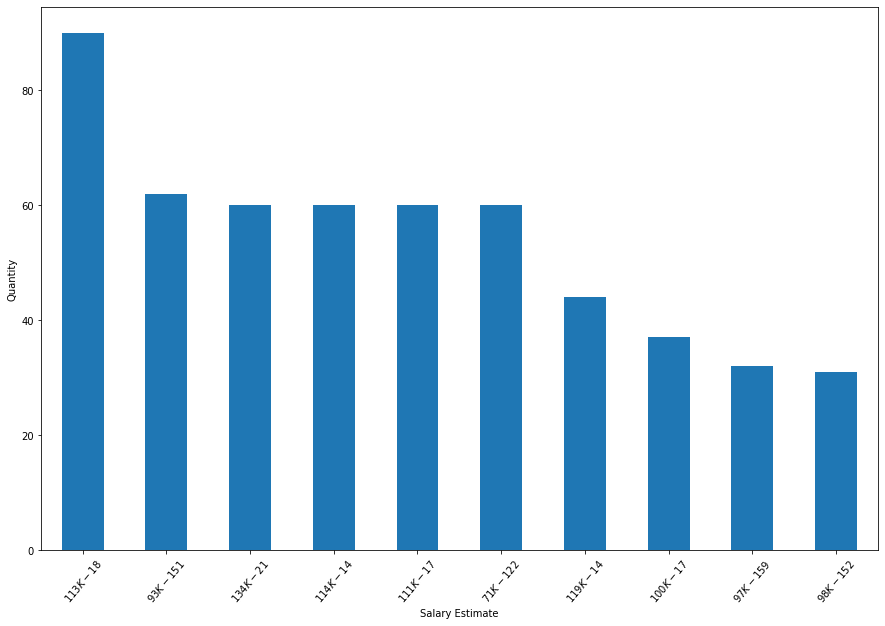

In [20]:
#Creating a bar plot using the Salary Estimate 
plt.figure(figsize=(15,10))
top_10_salaries.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Salary Estimate")
plt.ylabel("Quantity")
plt.show()

In [22]:
#Checking the to 10 most usual salaries 
top_3_industry=dataframe['Sector'].value_counts().head(5)
top_3_industry

Information Technology       1124
Business Services             679
-1                            546
Biotech & Pharmaceuticals     293
Finance                       270
Name: Sector, dtype: int64

In [29]:
#Checking the to 10 most usual salaries 
top_5_company=dataframe['Company Name'].value_counts().head(5)
top_5_company

Apple\n4.1                               60
IBM\n3.7                                 57
Amazon\n3.9                              47
Staffigo Technical Services, LLC\n5.0    28
Facebook\n4.5                            25
Name: Company Name, dtype: int64

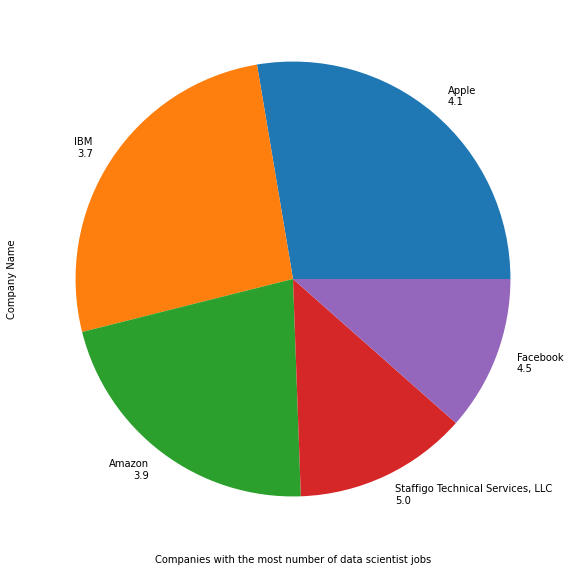

In [32]:
#Creating a pie plot using the Company Name 
plt.figure(figsize=(15,10))
top_5_company.sort_values(ascending=False).plot.pie()
plt.xticks(rotation=50)
plt.xlabel("Companies with the most number of data scientist jobs")
plt.show()

In [46]:
filtro2=['Salary Estimate','Company Name']
dataframe[filtro2]

,Salary Estimate,Company Name
0,$111K-$18,Hopper\n3.5
1,$111K-$18,Noom US\n4.5
2,$111K-$18,Decode_M
3,$111K-$18,Sapphire Digital\n3.4
4,$111K-$18,United Entertainment Group\n3.4
...,...,...
3904,$55K-$112,Tachyon Technologies\n4.4
3905,$55K-$112,"Staffigo Technical Services, LLC\n5.0"
3906,$55K-$112,"PDS Tech, Inc.\n3.8"
3907,$55K-$112,Data Resource Technologies\n4.0


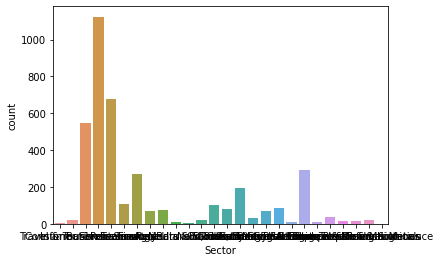

In [63]:
import seaborn as sns 
sns.countplot(x='Sector',data=dataframe)

In [10]:
dataframe['Headquarters'].unique()

array(['Montreal, Canada', 'New York, NY', 'Lyndhurst, NJ',
       'Hartford, CT', 'Stamford, CT', 'Brooklyn, NY',
       'London, United Kingdom', 'Burbank, CA', 'Chicago, IL',
       'Jacksonville, FL', 'Stockholm, Sweden', 'San Francisco, CA',
       'Memphis, TN', 'Warren, MI', 'Berlin, Germany', 'Menlo Park, CA',
       'Marina del Rey, CA', 'Washington, DC', '-1', 'San Jose, CA',
       'Seattle, WA', 'Reading, MA', 'Iselin, NJ', 'Norwalk, CT',
       'Tehran, Iran', 'Jersey City, NJ', 'Greenwich, CT',
       'Mountain View, CA', 'Langley, VA', 'Princeton, NJ', 'Wichita, KS',
       'East Northport, NY', 'South Plainfield, NJ', 'Medford, OR',
       'Bengaluru, India', 'North Brunswick, NJ', 'Baltimore, MD',
       'Plainsboro, NJ', 'Newark, NJ', 'San Diego, CA', 'Mc Lean, VA',
       'New York, NY (US), NY', 'Santa Monica, CA', 'San Antonio, TX',
       'Coconut Creek, FL', 'Port Washington, NY', 'MINATO-KU, Japan',
       'Carle Place, NY', 'Rockville Centre, NY', 'Piscataway, 

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=comp_per_category, x='Headquarters', y='ConvertedComp', palette=sns.color_palette("ch:2.5,-.2,dark=.3"))
plt.ylim(90000,140000)
plt.title('Total Salary and Frequency of Contributing to Open Source')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Contributing to Open Source Frequency')
plt.show()

In order to answer the questions, these are the things we did in this data preparation step:

Filtered the data so it only contains the developer responses.
Because JobSat column is a categorical data, we are going to fill the N/A values with the mode.
We have the differences in salary range (that really depends on which country the developers live in), so we are going to fill the N/A values in ConvertedComp with the average salary of the developer's Country. Then we drop the remaining N/A values (19 rows), it happens because there are countries with average ConvertedComp = NaN (all of the respondents from that country didn't fill the salary form).
Set the JobSat and OpenSourcer column into categorical data type.

In [ ]:
#checking the shape of dataframe -> 2.253 rows and 16 columns 
dataframe.shape 

(2253, 16)

In [ ]:
#checking the data types 
dataframe.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [ ]:
'''object     13
int64       2
float64     1
dtype: int64'''
dataframe.dtypes.value_counts()

object     13
int64       2
float64     1
dtype: int64

In [ ]:
dataframe['Salary Estimate'].describe()

count                           2253
unique                            90
top       $42K-$76K (Glassdoor est.)
freq                              57
Name: Salary Estimate, dtype: object

In [ ]:
#Checking if there is any null numbers 
dataframe.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [ ]:
#checking the colummns
dataframe.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [ ]:
#acessando coluna específica 
dataframe['Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2253, dtype: object

In [ ]:
#acessando os valores através de lista
salary_per_company=['Salary Estimate','Company Name']
dataframe[filtro]

,Salary Estimate,Company Name
0,$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2
1,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\n3.8
2,$37K-$66K (Glassdoor est.),Squarespace\n3.4
3,$37K-$66K (Glassdoor est.),Celerity\n4.1
4,$37K-$66K (Glassdoor est.),FanDuel\n3.9
...,...,...
2248,$78K-$104K (Glassdoor est.),"Avacend, Inc.\n2.5"
2249,$78K-$104K (Glassdoor est.),Arrow Electronics\n2.9
2250,$78K-$104K (Glassdoor est.),Spiceorb
2251,$78K-$104K (Glassdoor est.),Contingent Network Services\n3.1


In [ ]:
# Filtered the data so it only contains the survey result from the top 30 places with most job opportunities based on the total respondents
top_30_places = list(dataframe['Headquarters'].value_counts().head(20).index)
top_30_places

['New York, NY',
 '-1',
 'San Francisco, CA',
 'Chicago, IL',
 'Woodridge, IL',
 'Los Angeles, CA',
 'Houston, TX',
 'Austin, TX',
 'Princeton, NJ',
 'Philadelphia, PA',
 'Santa Clara, CA',
 'San Diego, CA',
 'Tampa, FL',
 'Dallas, TX',
 'Alpharetta, GA',
 'Irving, TX',
 'Irvine, CA',
 'London, United Kingdom',
 'Plainsboro, NJ',
 'Atlanta, GA']

In [ ]:
# Filtered the data so it only contains the survey result from the top 30 places with most job opportunities based on the total respondents
top_30_salaries = list(dataframe['Salary Estimate'].value_counts().head(10).index)
top_30_salaries

['$42K-$76K',
 '$41K-$78K',
 '$50K-$86K',
 '$35K-$67K',
 '$58K-$93K',
 '$43K-$76K',
 '$60K-$124',
 '$60K-$66K',
 '$27K-$52K',
 '$46K-$87K']

ValueError: ignored

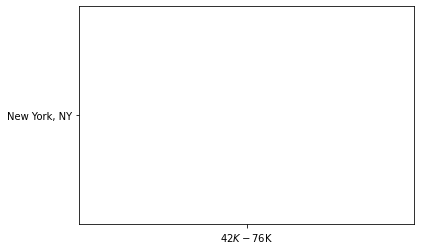

In [ ]:
import matplotlib.pyplot as plt  #Gráfico de linha
y=top_30_country
x=top_30_salaries
plt.bar(x,y)
plt.title ("Meu primeiro gráfico com Python")  #Nomeando gráficos
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

In [ ]:
#Which cities have the highest salaries?
filtro2=['Salary Estimate','Headquarters']
dataframe[filtro2]

,Salary Estimate,Headquarters
0,$37K-$66K,"New York, NY"
1,$37K-$66K,"New York, NY"
2,$37K-$66K,"New York, NY"
3,$37K-$66K,"McLean, VA"
4,$37K-$66K,"New York, NY"
...,...,...
2248,$78K-$104,"Alpharetta, GA"
2249,$78K-$104,"Centennial, CO"
2250,$78K-$104,-1
2251,$78K-$104,"West Chester, OH"


In [ ]:
dataframe.groupby('Headquarters')['Salary Estimate'].apply(list)

Headquarters
-1                          [$37K-$66K, $46K-$87K, $46K-$87K, $51K-$88K, $...
Abbott Park, IL                                        [$28K-$52K, $28K-$52K]
Aberdeen, United Kingdom                                          [$44K-$78K]
Abingdon, United Kingdom                                          [$50K-$93K]
Acton, MA                                                         [$58K-$93K]
                                                  ...                        
Worthington, OH                                                   [$47K-$74K]
Yakima, WA                                                        [$30K-$53K]
Yorktown Heights, NY                                   [$51K-$87K, $59K-$85K]
Yorktown, VA                                                      [$43K-$69K]
Zurich, Switzerland                         [$43K-$76K, $60K-$110, $53K-$94K]
Name: Salary Estimate, Length: 483, dtype: object

In [ ]:
#Pivotando os dados
#dataframe.pivot(index='canal_venda',columns='site',values='acessos')
#Pivotando os dados
dataframe.pivot(index='canal_venda',columns='site',values='acessos')

In [ ]:
#somando as linhas do dataframe
dataframe.sum(axis=1)

0       1964.2
1       1897.8
2       2008.4
3       2009.1
4       2016.9
         ...  
2248    2249.5
2249    4186.9
2250    2248.0
2251    4238.1
2252    4119.4
Length: 2253, dtype: float64

In [ ]:
#Calculando a moda - Which company has the most opportunities?
dataframe["Company Name"].mode()

0    Staffigo Technical Services, LLC\n5.0
dtype: object

In [ ]:
dataframe["Company Name"].

<bound method NDFrame.describe of 0                Vera Institute of Justice\n3.2
1       Visiting Nurse Service of New York\n3.8
2                              Squarespace\n3.4
3                                 Celerity\n4.1
4                                  FanDuel\n3.9
                         ...                   
2248                         Avacend, Inc.\n2.5
2249                     Arrow Electronics\n2.9
2250                                   Spiceorb
2251           Contingent Network Services\n3.1
2252                            SCL Health\n3.4
Name: Company Name, Length: 2253, dtype: object>

In [ ]:
#Contando os valores únicos  #para ver se os dados estão bem agrupados
dataframe['Company Name'].value_counts()

Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Lorven Technologies Inc\n4.0             19
Kforce\n4.1                              19
Robert Half\n3.5                         14
                                         ..
First Professional Services\n5.0          1
C2 GPS- Alamo Workforce\n3.4              1
Ava Consulting\n4.4                       1
Pegasus Knowledge Solutions\n4.2          1
Midland Credit Management\n3.3            1
Name: Company Name, Length: 1513, dtype: int64

In [ ]:
#Valores únicos de uma coluna
dataframe['Company Name'].unique()

array(['Vera Institute of Justice\n3.2',
       'Visiting Nurse Service of New York\n3.8', 'Squarespace\n3.4', ...,
       'Arrow Electronics\n2.9', 'Contingent Network Services\n3.1',
       'SCL Health\n3.4'], dtype=object)

In [ ]:
#Usando o groupby com valores numéricos  "Quantos acessos vou ter no meu site1?"
dataframe.groupby('Sector')['Industry'].sum()

Sector
-1                                    -1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1...
Accounting & Legal                    LegalAccountingAccountingAccountingAccountingA...
Aerospace & Defense                   Aerospace & DefenseAerospace & DefenseAerospac...
Arts, Entertainment & Recreation      Sports & RecreationGamblingGamblingSports & Re...
Biotech & Pharmaceuticals             Biotech & PharmaceuticalsBiotech & Pharmaceuti...
Business Services                     Research & DevelopmentAdvertising & MarketingB...
Construction, Repair & Maintenance    General Repair & MaintenanceCommercial Equipme...
Consumer Services                     Health, Beauty, & FitnessHealth, Beauty, & Fit...
Education                             Colleges & UniversitiesColleges & Universities...
Finance                               Investment Banking & Asset ManagementInvestmen...
Government                            Federal AgenciesMunicipal GovernmentsFederal A...
Health Care              

In [ ]:
'''print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))'''

To make comparisons between groups of a feature, you can use groupby() and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistics for all countries' points and price or select the most popular and expensive ones.

In [ ]:
# Groupby by Salary
salary = dataframe.groupby("Salary Estimate")
# Summary statistic of all countries
salary.describe().head()


Unnamed: 0                    ... Founded                
                     count    mean       std  ...     50%     75%     max
Salary Estimate                               ...                        
$110K-$19             29.0  1482.0  8.514693  ...  1997.0  2003.0  2016.0
$113K-$13             29.0   701.0  8.514693  ...  1939.0  1980.0  2016.0
$24K-$48K             29.0  1327.0  8.514693  ...  1970.0  1995.0  2015.0
$26K-$47K             29.0   435.0  8.514693  ...  1869.0  2000.0  2018.0
$27K-$52K             30.0   297.5  8.803408  ...  1984.5  1998.0  2011.0

[5 rows x 24 columns]

In [ ]:
# Groupby by Headquartes
cities = dataframe.groupby("Headquarters")

# Summary statistic of all countries
cities.describe().head()

dataframe.Headquarters.describe()

count             2253
unique             483
top       New York, NY
freq               206
Name: Headquarters, dtype: object

In [ ]:
#This selects the top 5 highest average points among all 44 countries:
salary.mean().sort_values(by="Rating",ascending=False).head(10)

,Unnamed: 0,Rating,Founded
Salary Estimate,,,
$32K-$56K,2151.500000,4.800000,1952.250000
-1,2149.000000,4.400000,2001.000000
$30K-$54K,508.500000,4.250000,1981.125000
$57K-$70K,1758.500000,4.150000,999.000000
$57K-$104,1901.000000,3.966667,1851.851852
$57K-$67K,2169.500000,3.957692,1838.923077
$93K-$159,1955.000000,3.892000,1758.160000
$89K-$151,1510.500000,3.750000,1568.035714
$48K-$88K,1442.000000,3.707407,1169.629630


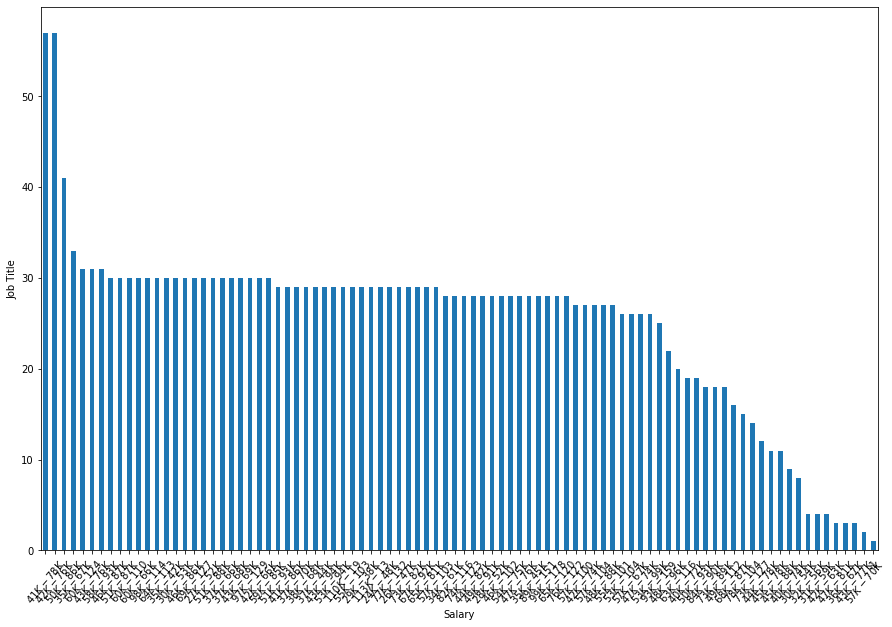

In [ ]:
plt.figure(figsize=(15,10))
salary.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Salary")
plt.ylabel("Job Title")
plt.show()

In [ ]:
'''Usando o groupby com a função agg
dataframe.groupby('canal_venda').agg({'site':'unique',
'acessos':'sum'})

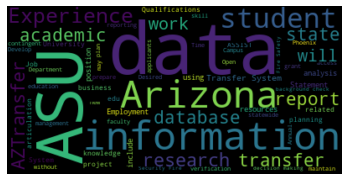

In [ ]:
# Start with one review:
text = job_description[1000]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
for text in texts:
  plt.show()

You can plot the number of wines by country using the plot method of Pandas DataFrame and Matplotlib. If you are not familiar with Matplotlib, I suggest taking a quick look at this tutorial.

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [ ]:
# Filtered the data so it only contains the survey result from the top 30 country based on the total respondents
top_30_country = list(dataframe['Headquarters'].value_counts().head(30).index)
filtered_developer_data = dataframe[dataframe['Headquarters'].isin(top_30_country)]

# Aggregate the data so we can visualize it later
aggregated_data = filtered_developer_data.groupby(['Headquarters','Company Name'], as_index=False)

# Add column percentage
total_respondents_per_country = filtered_developer_data['Country'].value_counts()





KeyError: ignored

In [49]:

type_industry = dataframe['Sector'].value_counts()
top_10_industry=dataframe['Sector'].value_counts().head(10)
top_10_industry



Information Technology       1124
Business Services             679
-1                            546
Biotech & Pharmaceuticals     293
Finance                       270
Health Care                   197
Insurance                     109
Education                     101
Manufacturing                  87
Government                     82
Name: Sector, dtype: int64